In [1]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import json

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [2]:
# filename = '/home/luluvyd/examples/data/MovieSummary_example.txt'
directory = '/home/dashi/lulu/corpus/MovieSummaries/MovieSummaries-break/'


In [3]:
nlp = spacy.load('en_core_web_md')
emos = loadEmotionWords('/home/dashi/lulu/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')

In [5]:
parsed_text = 'This is an awesome sentence. Where is the best cat?'
doc = nlp(parsed_text)
s = analyzeWordSize(doc)
print(len(doc.vocab))
print(s)
score = scoreEmotion(doc, emos)
print(score)

1340242
10
0.1


i : 0
i : 1
i : 2
i : 3
i : 4
i : 5
i : 6
i : 7
i : 8
i : 9
i : 10
i : 11
i : 12
i : 13
i : 14
i : 15
i : 16
i : 17
i : 18
i : 19
i : 20
i : 21
i : 22
i : 23
i : 24
i : 25
i : 26
i : 27
i : 28
i : 29
i : 30
i : 31
i : 32
i : 33
i : 34
i : 35
i : 36
i : 37
i : 38
i : 39
i : 40
i : 41
i : 42
i : 43
i : 44
i : 45
i : 46
i : 47
i : 48
i : 49
i : 50
i : 51
i : 52
i : 53
i : 54
i : 55
i : 56
i : 57
i : 58
i : 59
i : 60
i : 61
i : 62
i : 63
i : 64
i : 65
i : 66
i : 67
i : 68
i : 69
i : 70
i : 71
i : 72
i : 73
i : 74
i : 75
i : 76
i : 77
i : 78
i : 79
i : 80
i : 81
i : 82
i : 83
i : 84
i : 85
i : 86
i : 87
i : 88
i : 89
i : 90
i : 91
i : 92
i : 93


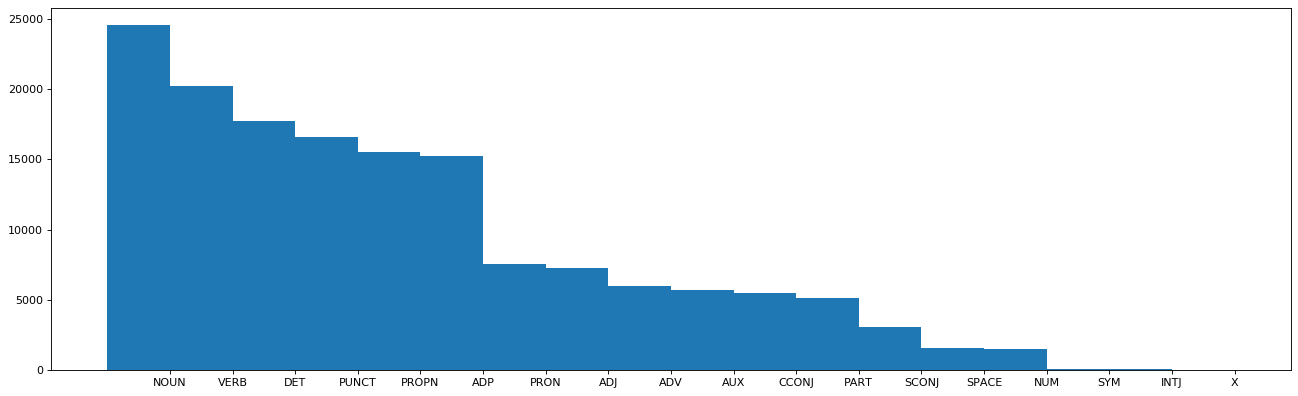

In [6]:
'''
POS histogram
error: doc input string cannot succeed 1 million characters
problem: iterating over text is too slow, parallelize
'''
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter = analyzePOS(doc)
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [7]:
'''
Sentence length histogram
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzeSentence(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
i : 3
i : 4
i : 5
i : 6
i : 7
i : 8
i : 9
i : 10
i : 11
i : 12
i : 13
i : 14
i : 15
i : 16
i : 17


KeyboardInterrupt: 

In [ ]:
'''
Emotion words histogram
'''
directory = '/home/dashi/lulu/corpus/MovieSummaries/MovieSummaries-break/'
read_files = glob.glob(directory + '*.txt')

counterEmos = Counter('')
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterEmos += analyzeEmotionWords(doc, emos) 
        print('i : ' + str(i))  
        i += 1
    
print(counterEmos)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterEmos)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
sumCounter(counterEmos)

In [ ]:
print(counterEmos)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterEmos)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Verb category histogram
'''
read_files = glob.glob(directory + '*.txt')

CounterAct = Counter('')
CounterLink = Counter('')
CounterHelp = Counter('')
CounterHM = Counter('')
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        a, b, c, d = analyzeVerbs(doc) 
        CounterAct += a
        CounterLink += b
        CounterHelp += c
        CounterHM += d
        print('i : ' + str(i))  
        i += 1
    
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(CounterAct)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(CounterLink)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(CounterHelp)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Pronoun, personal histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronPRP = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronPRP += analyzePronounPRP(doc) 
        i += 1
    
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronPRP)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronPRP)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Verb category histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterVerbAct = Counter('')
counterVerbLink = Counter('')
counterVerbHelp = Counter('')
counterVerbHM = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        a, b, c, d = analyzeVerbs(doc) 
        counterVerbAct += a
        counterVerbLink += b
        counterVerbHelp += c
        counterVerbHM += d
        i += 1
    
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterVerbAct)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
CounterVerbCategories = Counter({'Action' : sumCounter(counterVerbAct), 
                         'Linking' : sumCounter(counterVerbLink), 
                         'Helping' : sumCounter(counterVerbHelp),
                         'Modal' : sumCounter(counterVerbHM)})
Total = sumCounter(CounterVerbCategories)

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(CounterVerbCategories)
values = (int(float(v)*100/Total) for v in values)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()


In [ ]:
CounterVerbCategories = Counter({'Action' : sumCounter(counterVerbAct), 
                         'Linking' : sumCounter(counterVerbLink), 
                         'Helping' : sumCounter(counterVerbHelp)})

Total = sumCounter(CounterVerbCategories)

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(CounterVerbCategories)
values = [int(float(v)*100/Total) for v in values]
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
plt.show()


In [ ]:
'''
Article score distribution
Fraction of emotional words out of total number of words in an article 
'''
read_files = glob.glob(directory + '*.txt')

scoreDF = []
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        scoreDF.append(doc)
        if (i % 1000 == 0): 
            print(i)
        i += 1
    
# plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
# labels, values = rankCounter(counterPronPRP)
# indexes = np.arange(len(labels))
# width = 1
# plt.bar(indexes, values, width)
# plt.xticks(indexes + width * 0.5, labels)
# plt.show()